<hr />

**Natural Language Processing and Modelling**


Import Libraries

In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import sklearn
import string
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

# Set the random seed for reproducibility
RAND_SEED = 27
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)

In [ ]:
# Install the flair library
import importlib

if importlib.util.find_spec('flair') is None:
    !pip install flair==0.10

import flair
from flair.data import Sentence
from flair.embeddings import WordEmbeddings, TransformerWordEmbeddings, TransformerDocumentEmbeddings

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.7/508.7 kB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9674 sha256=9c3cc

In [ ]:
# Additional imports

import spacy
try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    import spacy.cli
    print("Model not found. Downloading.")
    spacy.cli.download("en_core_web_md")
    import en_core_web_md
    nlp = en_core_web_md.load()

from spacy.lang.en.stop_words import STOP_WORDS
print("There are {} stop words in spaCy.\n".format(len(STOP_WORDS)))
stop_words = spacy.lang.en.stop_words.STOP_WORDS

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import tensorflow as tf
import tensorflow_hub as hub

from flair.embeddings import ELMoEmbeddings  # Get the ELMo embeddings from flair
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the ELMo model as a Keras Layer
elmo_layer = hub.KerasLayer("https://tfhub.dev/google/elmo/3", trainable=False)

from sklearn.metrics.pairwise import cosine_similarity

import gensim
from gensim.models import Word2Vec

import itertools

from sklearn.metrics import confusion_matrix

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import transformers

from collections import namedtuple
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer, EvalPrediction
from transformers import (Trainer, TrainingArguments, glue_compute_metrics, glue_output_modes, glue_tasks_num_labels, set_seed, default_data_collator)

# Get the ELMo embeddings from flair
from flair.embeddings import ELMoEmbeddings

import tensorflow_hub as hub

from nltk.tokenize import word_tokenize
from gensim.models import FastText

from sklearn.model_selection import ParameterGrid

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


Model not found. Downloading.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
There are 326 stop words in spaCy.



<hr />

Input News Article (Selected for Analysis)

In [ ]:
input_paragraph = "The BT Tower might look like a giant sonic screwdriver, but it’s an iconic and beloved part of London’s skyline. In fact, the tower, which was built in 1964, is so loved that it even inspired the Coldplay lyrics: ‘lights will guide you home’. And soon you’ll be able to stay the night inside the legendary structure, as it’s being turned into a hotel. BT Group announced today (February 21) that it will sell the BT Tower for £275 million to MCR Hotels, which will turn the Grade II-listed building into a swanky hotel. MCR will work with London-based architecture firm Heatherwick Studio, which was founded by all-star architect Thomas Heatherwick. Heatherwick, the designer behind Coal Drops Yard, the massive new Google offices and the never realised Garden Bridge, is known for his sleek, futuristic designs that utilise lots of greenery and plants. So the refurbished tower is probably going to look pretty cool."

Tokenization

In [ ]:
#Tokenize
def tokenizer(text: str) -> list:
  text = [i.strip() for i in re.split(r'(\W+)',text) if i.strip()]
  return text

#Test tokenization function
input_text = "Pre-processing is useful to most NLP algorithms - it allows us to transform text into a more digestible format for models."
print("\nExample:\n", input_text)
print("\nTokenized example:\n", tokenizer(input_text))

def word_tokenize(text: str) -> list:
  paragraph = [i.strip() for i in re.split(r'(\W+)', text) if i.strip()]
  return paragraph

#Print input paragraph
print("\nExample:\n", input_paragraph)

#Print input paragraph after tokenisation
print("\nTokenized example:\n", tokenizer(input_paragraph))



Example:
 Pre-processing is useful to most NLP algorithms - it allows us to transform text into a more digestible format for models.

Tokenized example:
 ['Pre', '-', 'processing', 'is', 'useful', 'to', 'most', 'NLP', 'algorithms', '-', 'it', 'allows', 'us', 'to', 'transform', 'text', 'into', 'a', 'more', 'digestible', 'format', 'for', 'models', '.']

Example:
 The BT Tower might look like a giant sonic screwdriver, but it’s an iconic and beloved part of London’s skyline. In fact, the tower, which was built in 1964, is so loved that it even inspired the Coldplay lyrics: ‘lights will guide you home’. And soon you’ll be able to stay the night inside the legendary structure, as it’s being turned into a hotel. BT Group announced today (February 21) that it will sell the BT Tower for £275 million to MCR Hotels, which will turn the Grade II-listed building into a swanky hotel. MCR will work with London-based architecture firm Heatherwick Studio, which was founded by all-star architect Thoma

Lemmatisation

In [ ]:
#Lemmatize
def word_lemmatize(tokens: list) -> list:
  #TODO: your code goes here
  return " ".join([token.lemma_ for token in nlp(input_paragraph)])

#Testing the function

#Print input paragraph
print("\nExample:\n", tokenizer(input_paragraph))

#Print input paragraph's tokens after lemmatization
lemm_paragraph = print("\nTokenized example:\n", word_lemmatize(input_paragraph))


Example:
 ['The', 'BT', 'Tower', 'might', 'look', 'like', 'a', 'giant', 'sonic', 'screwdriver', ',', 'but', 'it', '’', 's', 'an', 'iconic', 'and', 'beloved', 'part', 'of', 'London', '’', 's', 'skyline', '.', 'In', 'fact', ',', 'the', 'tower', ',', 'which', 'was', 'built', 'in', '1964', ',', 'is', 'so', 'loved', 'that', 'it', 'even', 'inspired', 'the', 'Coldplay', 'lyrics', ': ‘', 'lights', 'will', 'guide', 'you', 'home', '’.', 'And', 'soon', 'you', '’', 'll', 'be', 'able', 'to', 'stay', 'the', 'night', 'inside', 'the', 'legendary', 'structure', ',', 'as', 'it', '’', 's', 'being', 'turned', 'into', 'a', 'hotel', '.', 'BT', 'Group', 'announced', 'today', '(', 'February', '21', ')', 'that', 'it', 'will', 'sell', 'the', 'BT', 'Tower', 'for', '£', '275', 'million', 'to', 'MCR', 'Hotels', ',', 'which', 'will', 'turn', 'the', 'Grade', 'II', '-', 'listed', 'building', 'into', 'a', 'swanky', 'hotel', '.', 'MCR', 'will', 'work', 'with', 'London', '-', 'based', 'architecture', 'firm', 'Heatherwi

Remove Stopwords

In [ ]:
#Stopword Function
print(stop_words)
print(input_paragraph)
lemm_paragraph = tokenizer(word_lemmatize(lemm_paragraph))
print(lemm_paragraph)

def remove_stopwords(tokens: list) -> list:
  stop_paragraph = [word for word in lemm_paragraph if word not in stop_words]
  return stop_paragraph

# Testing the function

#Print input paragraph's tokens
print("\nExample:\n", word_lemmatize(input_paragraph))

#Print input paragraph's tokens after stopword function
print("\nTokenized example:\n", remove_stopwords(input_paragraph))

{'on', 'say', 'few', 'during', 'whereas', 'something', 'therefore', 'become', 'except', 'those', 'former', 'their', 'done', 'seem', 'first', 'be', 'her', 'either', '’d', 'just', 'becomes', 'please', 'at', 'whole', 'two', 'them', 'hers', 'ca', 'ten', 'part', 'fifteen', 'am', 'due', 'so', 'hereby', 'beyond', 'unless', 'while', 'whether', 'nobody', 'there', 'formerly', 'whereupon', 'for', 'through', 'nor', 'are', 'others', 'amongst', 'here', 'thereafter', 'serious', 'used', 'noone', "'m", 'none', 'were', 'any', 'seemed', 'eleven', 'onto', 'wherever', 'mine', 'namely', 'latter', 'becoming', 'an', 'both', 'thru', 'go', 'over', 'when', "'ll", 'whither', 'no', 'doing', 'what', 'you', 'several', 'being', 'too', 'my', 'without', 'ours', 'anyway', 'made', 'around', 'front', 'across', 'among', 'where', 'further', 'until', 'seems', 'only', 'cannot', 'his', 'yourselves', "'ve", 'every', '’ll', 'not', 'bottom', 'have', 'myself', 'otherwise', 'because', 'anything', 'might', 'mostly', 'empty', 'howeve

Feature Exploration

In [ ]:
# Loads the SST-2 dataset

# Test and train paths
path_train = "train.tsv"
path_dev = "dev.tsv"

# Load the train and dev data
df_train = pd.read_csv(path_train, sep='\t')
df_dev = pd.read_csv(path_dev, sep='\t')

# Split df_dev into a validation and test set
df_dev, df_test = df_dev[:400], df_dev[400:]

# Observe training data
pd.set_option('max_colwidth', 1000)
df_train[:10]

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates something rather beautiful about human nature,1
3,remains utterly satisfied to remain the same throughout,0
4,on the worst revenge-of-the-nerds clichés the filmmakers could dredge up,0
5,that 's far too tragic to merit such superficial treatment,0
6,"demonstrates that the director of such hollywood blockbusters as patriot games can still turn out a small , personal film with an emotional wallop .",1
7,of saucy,1
8,a depressed fifteen-year-old 's suicidal poetry,0
9,are more deeply thought through than in most ` right-thinking ' films,1


Create and Test 'Positive' Word Identifier Function

In [ ]:
#Create 'positive' identifier function
def is_good(text: str) -> int:
  good_words = ['good', 'nice', 'love', 'fantastic']
  input_tokenized = tokenizer(text)
  for word in good_words:
    if word in input_tokenized:
      return 1
  else:
    return 0

input_text = "that loves its characters and communicates something rather beautiful about human nature"
print(input_text)
# Test and print 0
print(is_good(input_text))

input_text = "I love NLP"
print(input_text)
# Test and print 1
print(is_good(input_text))

that loves its characters and communicates something rather beautiful about human nature
0
I love NLP
1


Create and Test 'Negative' Word Identifier Function

In [ ]:
#Create 'negative' identifier function
def is_bad(text: str) -> int:
  bad_words = ['bad', 'ugly', 'boring', 'sad']
  input_tokenized = tokenizer(text)
  for word in bad_words:
    if word in input_tokenized:
      return 1
  else:
    return 0

input_text = "that loves its characters and communicates something rather beautiful about human nature"
print(input_text)
# Test and print 0
print(is_bad(input_text))

input_text = "lockdowns can be boring but learning NLP totally makes up for it"
print(input_text)
# Test and print 1
print(is_bad(input_text))

that loves its characters and communicates something rather beautiful about human nature
0
lockdowns can be boring but learning NLP totally makes up for it
1


Logistic Regression Model: Using Positive and Negative Identifier Functions

In [ ]:
# Text Vectorisation

# Vectorized train dataset
def transform_dataset(df_train):
  new_train_dataset = pd.DataFrame()
  new_train_dataset['X1'] = df_train['sentence'].apply(is_good).copy()
  new_train_dataset['X2'] = df_train['sentence'].apply(is_bad).copy()
  new_train_dataset['label'] = df_train['label']
  return new_train_dataset

new_train_dataset = transform_dataset(df_train)

pd.set_option('max_colwidth', 1000)
new_train_dataset.head(15)

# Vectorized validation dataset
def transform_dev_dataset(df_dev):
  new_dev_dataset = pd.DataFrame()
  new_dev_dataset['X1'] = df_dev['sentence'].apply(is_good).copy()
  new_dev_dataset['X2'] = df_dev['sentence'].apply(is_bad).copy()
  new_dev_dataset['label'] = df_dev['label']
  return new_dev_dataset

new_dev_dataset = transform_dev_dataset(df_dev)

pd.set_option('max_colwidth', 1000)
new_dev_dataset.head(15)

# Vectorized test dataset
def transform_test_dataset(df_test):
  new_test_dataset = pd.DataFrame()
  new_test_dataset['X1'] = df_test['sentence'].apply(is_good).copy()
  new_test_dataset['X2'] = df_test['sentence'].apply(is_bad).copy()
  new_test_dataset['label'] = df_test['label']
  return new_test_dataset

new_test_dataset = transform_test_dataset(df_test)

pd.set_option('max_colwidth', 1000)
new_test_dataset.head(15)


,X1,X2,label
400,0,0,1
401,0,0,1
402,1,0,0
403,0,0,0
404,0,0,1
405,1,0,0
406,0,0,1
407,0,0,0
408,0,0,0
409,0,0,0


Train Model and Print Performance

In [ ]:
# Performance of the training set on the validation

# Define inputs (x) and labels (y)
X_train = np.column_stack((new_train_dataset['X1'].values, new_train_dataset['X2'].values))
X_dev = np.column_stack((new_dev_dataset['X1'].values, new_dev_dataset['X2'].values))
label_train =  new_train_dataset['label']
label_dev =  new_dev_dataset['label']

# Define model
model = LogisticRegression()

# Train model
model.fit(X_train, label_train)

# Get model predictions on train and test set
y_pred_train = model.predict(X_train)
y_pred_dev = model.predict(X_dev)
y_pred_dev_proba = model.predict_proba(X_dev)

# Print performance
acc_train = 100 * accuracy_score(y_true=label_train, y_pred=y_pred_train)
acc_dev = 100 * accuracy_score(y_true=label_dev, y_pred=y_pred_dev)
acc_dev_reference = acc_dev  # keep a copy of the score for evaluating the upcoming exercise

print("Accuracy score on train is {:.2f}%".format(acc_train))
print("Accuracy score on dev is {:.2f}%".format(acc_dev))

Accuracy score on train is 57.25%
Accuracy score on dev is 55.00%


In [ ]:
# Performance of the training set on the test set

# Define the inputs (x) and labels (y)
X_train = np.column_stack((new_train_dataset['X1'].values, new_train_dataset['X2'].values))
X_test = np.column_stack((new_test_dataset['X1'].values, new_test_dataset['X2'].values))
label_train =  new_train_dataset['label']
label_test =  new_test_dataset['label']

# Define model
model = LogisticRegression()

# Train model
model.fit(X_train, label_train)

# Get model predictions on train and test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_test_proba = model.predict_proba(X_test)

# Print performance
acc_train = 100 * accuracy_score(y_true=label_train, y_pred=y_pred_train)
acc_test = 100 * accuracy_score(y_true=label_test, y_pred=y_pred_test)
acc_test_reference = acc_test  # keep a copy of the score for evaluating the upcoming exercise

print("Accuracy score on train is {:.2f}%".format(acc_train))
print("Accuracy score on test is {:.2f}%".format(acc_test))

Accuracy score on train is 57.25%
Accuracy score on test is 52.33%


Feature Engineered Logistic Regression Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from torchtext.vocab import GloVe
glove_vectors = GloVe(name = '6B', dim = 100)

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

.vector_cache/glove.6B.zip: 862MB [02:39, 5.40MB/s]                           
100%|█████████▉| 399999/400000 [00:25<00:00, 15709.99it/s]


--2024-03-07 21:55:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-03-07 21:55:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-07 21:55:37--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [2]:
# Second logistic regression using feature engineering

# Assign label inputs
label_train_fe =  new_train_dataset['label'].values.reshape(-1, 1)
label_dev_fe =  new_dev_dataset['label'].values.reshape(-1, 1)
label_test_fe =  new_test_dataset['label'].values.reshape(-1, 1)

# Create one scaler instance for all datasets
scaler = StandardScaler()

# Fit and transform the training features
X_train_fe_scaler = scaler.fit_transform(new_train_dataset[['X1', 'X2']].values)

# Apply the scaler transformation to the dev and test sets
X_dev_fe_scaler = scaler.fit_transform(new_dev_dataset[['X1', 'X2']].values)
X_test_fe_scaler = scaler.fit_transform(new_test_dataset[['X1', 'X2']].values)


In [ ]:
# Define the model
model = LogisticRegression()

# Train the model
model.fit(X_train_fe_scaler, label_train_fe)

# Model predictions on train and test set
y_pred_train_fe = model.predict(X_train_fe_scaler)
y_pred_dev_fe = model.predict(X_dev_fe_scaler)
y_pred_dev_proba_fe = model.predict_proba(X_dev_fe_scaler)

#Print its performance
acc_train_fe = 100 * accuracy_score(y_true=label_train_fe, y_pred=y_pred_train_fe)
acc_dev_fe = 100 * accuracy_score(y_true=label_dev_fe, y_pred=y_pred_dev_fe)
acc_dev_reference = acc_dev_fe  # keep a copy of the score for evaluating the upcoming exercise

print("Accuracy score on train is {:.2f}%".format(acc_train_fe))
print("Accuracy score on dev is {:.2f}%".format(acc_dev_fe))

Accuracy score on train is 57.25%
Accuracy score on dev is 55.00%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Grid Search on the logistic regression on the train and test sets

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

logistic_reg = LogisticRegression()

grid_search = GridSearchCV(estimator = logistic_reg, param_grid = param_grid, cv = 5)

grid_search.fit(X_train_fe_scaler, label_train_fe.ravel())

best_C = grid_search.best_params_['C']

final_model = LogisticRegression(C = best_C)
final_model.fit(X_train_fe_scaler, label_train_fe)

accuracy = final_model.score(X_dev_fe_scaler, label_dev_fe)
print("Accuracy score on train is:",(accuracy))

Accuracy score on train is: 0.55


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Logistic Regression on TF-IDF Representations

In [ ]:
# Define the inputs (x) and labels (y)
x_train_tfidf, y_train_tfidf = df_train['sentence'].values, df_train['label'].values
x_dev_tfidf, y_dev_tfidf = df_dev['sentence'].values, df_dev['label'].values

# Initialize TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_tfid_train = vectorizer.fit_transform(x_train_tfidf)
X_tfid_dev = vectorizer.transform(x_dev_tfidf)

# Define the model
model_tfid = LogisticRegression(C = 0.1)

# Train the model
model_tfid.fit(X_tfid_train, y_train_tfidf)

# Model predictions on train and test set
y_pred_train_tfidf = model_tfid.predict(X_tfid_train)
y_pred_dev_tfidf = model_tfid.predict(X_tfid_dev)
y_pred_dev_proba_tfidf = model_tfid.predict_proba(X_tfid_dev)

# Evaluate the model accuracy
acc_train = 100 * accuracy_score(y_true=y_train_tfidf, y_pred=y_pred_train_tfidf)
acc_dev = 100 * accuracy_score(y_true=y_dev_tfidf, y_pred=y_pred_dev_tfidf)
acc_dev_reference = acc_dev  # keep a copy of the score for evaluating the upcoming exercise

print("Accuracy score on train is {:.2f}%".format(acc_train))
print("Accuracy score on dev is {:.2f}%".format(acc_dev))

Accuracy score on train is 84.60%
Accuracy score on dev is 80.00%


Error Analysis: Comparing Logistic Regression Model and TF-IDF Logistic Regression Model

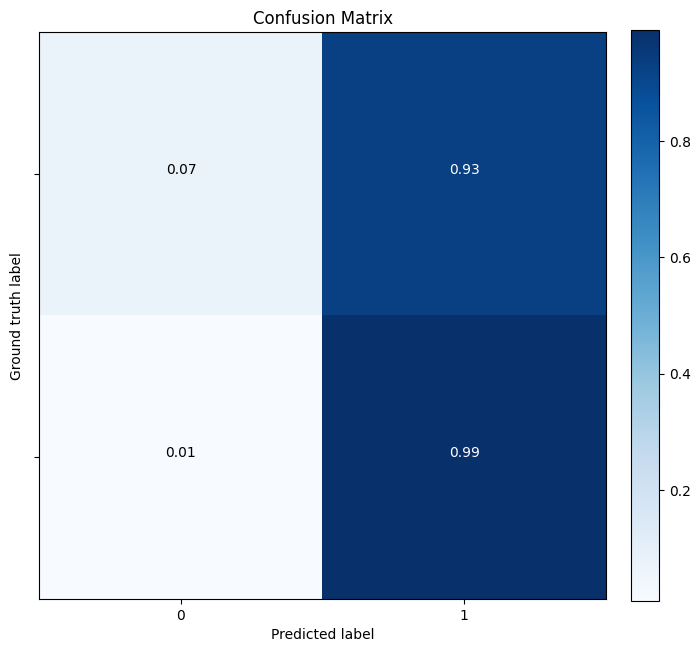

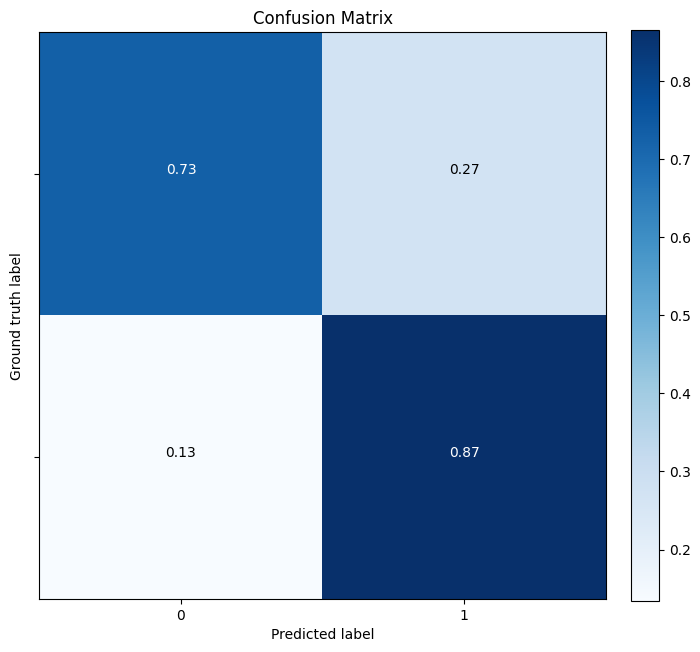

In [ ]:
# Feature engineered logistic regression model
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar(fraction=0.046, pad=0.04)

    # Add the labels
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set(yticks=[-0.5, 1.5],
           xticks=[0, 1],
           yticklabels=classes,
           xticklabels=classes)
    ax.yaxis.set_major_locator(matplotlib.ticker.IndexLocator(base=1, offset=0.5))
    if title:
        plt.title(title)
    plt.ylabel('Ground truth label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot the confusion matrix for the feature engineered logistic regression model's validation set
cm = confusion_matrix(y_true=label_dev, y_pred=y_pred_dev)
plot_confusion_matrix(cm, ("0", "1"), normalize=True)

# Plot the confusion matrix for the TFIDF logistic regression model's validation set
cm = confusion_matrix(y_true=y_dev_tfidf, y_pred=y_pred_dev_tfidf)
plot_confusion_matrix(cm, ("0", "1"), normalize=True)

<hr />

Text Similarity

In [ ]:
# Example Sentences
sentence_1 = "He has been strolling along the river bank in the local park. The tree leaves were rustling and the birds were chirping. It was truly magical."
sentence_2 = "The man went for a walk on the grass next to the stream. The birds were singing and the trees were dancing in the wind. It was a great experience."

Derive Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
def get_similarity(embedding_1:np.array, embedding_2:np.array) -> float:
  embedding_1 = embedding_1.reshape(1, -1)
  embedding_2 = embedding_2.reshape(1, -1)
  return cosine_similarity(embedding_1, embedding_2)

# Testing the function with the following vectors
embedding_1 = np.array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
embedding_2 = np.array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

print(get_similarity(embedding_1, embedding_2))
print(get_similarity(embedding_2, embedding_1))



[[0.53452248]]
[[0.53452248]]


Similarity Between word2vec Embeddings

In [ ]:
#Word2Vec Tokenization
def word2vec_tokenize(text):
    return text.split()

word2vec_s1 = word2vec_tokenize(sentence_1)
word2vec_s2 = word2vec_tokenize(sentence_2)

word2vec_sentences = [word2vec_s1, word2vec_s2]

word2vec_model = Word2Vec(sentences = word2vec_sentences, vector_size = 100, window = 5, min_count = 1, workers = 4)

word2vec_s1_embedding = [word2vec_model.wv[word] for word in word2vec_s1 if word in word2vec_model.wv]
word2vec_s2_embedding = [word2vec_model.wv[word] for word in word2vec_s2 if word in word2vec_model.wv]

def get_similarity_word2vec(embedding_1:np.array, embedding_2:np.array) -> float:
  word2vec_similarity = cosine_similarity([np.mean(word2vec_s1_embedding, axis = 0)], [np.mean(word2vec_s2_embedding, axis = 0)])
  return word2vec_similarity

# Embed sentences using spaCy word embeddings
word2vec_vector_1 = nlp(sentence_1).vector
word2vec_vector_2 = nlp(sentence_2).vector

# Find the similarity between two vectors

# Reshape the embeddings to 2D arrays
similarity = cosine_similarity(word2vec_vector_1.reshape(1, -1), word2vec_vector_2.reshape(1, -1))[0][0]

similarity_w2v= get_similarity_word2vec(word2vec_vector_1, word2vec_vector_2)
print(similarity_w2v)

[[0.64586526]]


Similarity Using Bag of Words

In [ ]:
# Bag of Words Functions

def lowercase(text):
    return text.lower()

corpus = [sentence_1, sentence_2]
print(corpus)

def spacy_word_tokenize(text):
    return [token.text for token in nlp(text)]

print(spacy_word_tokenize(sentence_1))

def build_vocab(corpus):
    vocab = {'OOV': 0}
    for doc in corpus:
        for token in spacy_word_tokenize(doc):
            if token not in vocab:
                vocab[token] = len(vocab)
    return vocab

# Lowercase all sentences
corpus = [lowercase(sentence) for sentence in corpus]

print(corpus)

vocab = build_vocab(corpus)
print(vocab)

def featurise_bow(text, vocab=vocab):
    counts = [0] * len(vocab)
    tokens = spacy_word_tokenize(text)
    for token in tokens:
        if token in vocab:
            counts[vocab[token]] += 1
        else:
            counts[vocab['OOV']] += 1
    return counts

# Embed sentences using spaCy word embeddings
word_vector_1 = nlp(sentence_1).vector
word_vector_2 = nlp(sentence_2).vector

# Find the similarity between two vectors

# Reshape the embeddings to 2D arrays
similarity = cosine_similarity(word_vector_1.reshape(1, -1), word_vector_2.reshape(1, -1))[0][0]

similarity_w2v= get_similarity(word_vector_1, word_vector_2)
print(similarity_w2v)

['He has been strolling along the river bank in the local park. The tree leaves were rustling and the birds were chirping. It was truly magical.', 'The man went for a walk on the grass next to the stream. The birds were singing and the trees were dancing in the wind. It was a great experience.']
['He', 'has', 'been', 'strolling', 'along', 'the', 'river', 'bank', 'in', 'the', 'local', 'park', '.', 'The', 'tree', 'leaves', 'were', 'rustling', 'and', 'the', 'birds', 'were', 'chirping', '.', 'It', 'was', 'truly', 'magical', '.']
['he has been strolling along the river bank in the local park. the tree leaves were rustling and the birds were chirping. it was truly magical.', 'the man went for a walk on the grass next to the stream. the birds were singing and the trees were dancing in the wind. it was a great experience.']
{'OOV': 0, 'he': 1, 'has': 2, 'been': 3, 'strolling': 4, 'along': 5, 'the': 6, 'river': 7, 'bank': 8, 'in': 9, 'local': 10, 'park': 11, '.': 12, 'tree': 13, 'leaves': 14, '

Modelling

Fast Text Modelling

<hr />

In [ ]:
#FastText Modelling

# LOCAL paths
path_train = "train.tsv"
path_dev = "dev.tsv"

# Load in the train and dev data
df_train = pd.read_csv(path_train, sep='\t')
df_dev = pd.read_csv(path_dev, sep='\t')

#Split df_dev into a validation and test set
df_dev, df_test = df_dev[:400], df_dev[400:]

# Quick look at the training data
pd.set_option('max_colwidth', 1000)
df_train[:10]

# Function for tokenizing the dataset's sentence column
def df_tokenization(sentence):
    tokens = sentence.lower().split()
    return tokens

# Apply the tokenization (training set)
df_train_tokens = df_train['sentence'].apply(df_tokenization)

train_model = FastText(df_train, vector_size = 128, window = 5, min_count = 3, workers = 4, epochs = 10, seed = 42,sg = 1)
train_model.save("df_train_ftmodel")

load_train_model = FastText.load("df_train_ftmodel")

# Apply the tokenization (validation set)
df_dev_tokens = df_dev['sentence'].apply(df_tokenization)

dev_model = FastText(df_dev, vector_size = 128, window = 5, min_count = 3, workers = 4, epochs = 10, seed = 42,sg = 1)
dev_model.save("df_dev_ftmodel")

load_dev_model = FastText.load("df_dev_ftmodel")

# Apply the tokenization (test set)
df_test_tokens = df_test['sentence'].apply(df_tokenization)

test_model = FastText(df_test, vector_size = 128, window = 5, min_count = 3, workers = 4, epochs = 10, seed = 42,sg = 1)
test_model.save("df_test_ftmodel")

load_test_model = FastText.load("df_test_ftmodel")

# Function for word embedding
def df_embed(tokens):
  df_embeddings = [train_model.wv[word] for word in tokens if word in train_model.wv]
  if df_embeddings:
    return sum(df_embeddings)/ len(df_embeddings)
  else:
    return [0] * train_model.vector_size

# Embed the train and test sets
X_FT_train_embedding = [df_embed(tokens) for tokens in df_train_tokens]
X_FT_dev_embedding = [df_embed(tokens) for tokens in df_dev_tokens]
X_FT_test_embedding = [df_embed(tokens) for tokens in df_test_tokens]

# Define the inputs (x) and labels (y)
label_FT_train =  df_train['label']
label_FT_dev =  df_dev['label']
label_FT_test =  df_test['label']

# Define the model
model_FT = LogisticRegression()

# Train the model
model_FT.fit(X_FT_train_embedding, label_FT_train)

# Get model predictions on train and test set
y_pred_ft_train = model_FT.predict(X_FT_train_embedding)
y_pred_ft_test = model_FT.predict(X_FT_test_embedding)
y_pred_ft_test_proba = model_FT.predict_proba(X_FT_test_embedding)

# Print its performance
acc_train = 100 * accuracy_score(y_true=label_FT_train, y_pred=y_pred_ft_train)
acc_test = 100 * accuracy_score(y_true=label_FT_test, y_pred=y_pred_ft_test)
acc_test_reference = acc_test  # keep a copy of the score for evaluating the upcoming exercise

print("Accuracy score on train is {:.2f}%".format(acc_train))
print("Accuracy score on test is {:.2f}%".format(acc_test))


Accuracy score on train is 55.78%
Accuracy score on test is 50.00%


In [ ]:
#FastText

# LOCAL paths
path_train = "train.tsv"
path_dev = "dev.tsv"

# Load in the train and dev data
df_train = pd.read_csv(path_train, sep='\t')
df_dev = pd.read_csv(path_dev, sep='\t')

#Split df_dev into a validation and test set for the purposes of this assignment
df_dev, df_test = df_dev[:400], df_dev[400:]

# Quick look at the training data
pd.set_option('max_colwidth', 1000)
df_train[:10]

#Function for tokenizing the dataset's sentence column
def df_tokenization(sentence):
    tokens = sentence.lower().split()
    return tokens

#Apply the tokenization (training set)
df_train_tokens = df_train['sentence'].apply(df_tokenization)

train_model = FastText(df_train, vector_size = 128, window = 5, min_count = 3, workers = 4, epochs = 10, seed = 42,sg = 1)
train_model.save("df_train_ftmodel")

load_train_model = FastText.load("df_train_ftmodel")

#Apply the tokenization (validation set)
df_dev_tokens = df_dev['sentence'].apply(df_tokenization)

dev_model = FastText(df_dev, vector_size = 128, window = 5, min_count = 3, workers = 4, epochs = 10, seed = 42,sg = 1)
dev_model.save("df_dev_ftmodel")

load_dev_model = FastText.load("df_dev_ftmodel")

#Apply the tokenization(test set)
df_test_tokens = df_test['sentence'].apply(df_tokenization)

test_model = FastText(df_test, vector_size = 128, window = 5, min_count = 3, workers = 4, epochs = 10, seed = 42,sg = 1)
test_model.save("df_test_ftmodel")

load_test_model = FastText.load("df_test_ftmodel")

#Function for word embedding
def df_embed(tokens, model):
  df_embeddings = [train_model.wv[word] for word in tokens if word in train_model.wv]
  if df_embeddings:
    return sum(df_embeddings)/ len(df_embeddings)
  else:
    return [0] * train_model.vector_size

#Embed the train and test sets
X_FT_train_embedding = [df_embed(tokens, load_train_model) for tokens in df_train_tokens]
X_FT_dev_embedding = [df_embed(tokens, load_dev_model) for tokens in df_dev_tokens]
X_FT_test_embedding = [df_embed(tokens, load_test_model) for tokens in df_test_tokens]

# Define the inputs (x) and labels (y)
label_FT_train =  df_train['label']
label_FT_dev =  df_dev['label']
label_FT_test =  df_test['label']

#Define logistic regression
model_FT = LogisticRegression()

#Train the model
model_FT.fit(X_FT_train_embedding, label_FT_train)

#Get model predictions on train and test set
y_pred_ft_train = model_FT.predict(X_FT_train_embedding)
y_pred_ft_test = model_FT.predict(X_FT_test_embedding)
y_pred_ft_test_proba = model_FT.predict_proba(X_FT_test_embedding)

#Print its performance
acc_train = 100 * accuracy_score(y_true=label_FT_train, y_pred=y_pred_ft_train)
acc_test = 100 * accuracy_score(y_true=label_FT_test, y_pred=y_pred_ft_test)
acc_test_reference = acc_test  # keep a copy of the score for evaluating the upcoming exercise

print("Accuracy score on train is {:.2f}%".format(acc_train))
print("Accuracy score on test is {:.2f}%".format(acc_test))



Accuracy score on train is 55.78%
Accuracy score on test is 50.00%


Apply stochastic gradient descent to improve the model's performance using the validation set

In [ ]:
# Set the learning rate, iterations, and weights (m - coefficients, c - bias) for optimization
LR = 0.1
epochs = 50
c = 0
m = np.zeros_like(X_FT_train_embedding[0])

# Define sigmoid to convert predictions into probabilities
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
  return sig

# Perform stochastic gradient descent for every epoch
for epoch in range(1, epochs +1):
  for i in range(len(X_FT_train_embedding)):
    z = np.dot(m, X_FT_train_embedding[i]) + c
    y_pred = sigmoid(z)
    # Compute the gradient with respect to m
    gr_wrt_m = X_FT_train_embedding[i] * (label_FT_train[i] - y_pred)
    # Compute the gradient with respect to c
    gr_wrt_c = label_FT_train[i] - y_pred
    # Update m and c using the gradients
    m = m + LR * gr_wrt_m
    c = c + LR * gr_wrt_c

# Perform predictions using the gradient descent optimizations on the dev set
predictions_dev = []
for i in range(len(X_FT_dev_embedding)):
  z = np.dot(m, X_FT_dev_embedding[i]) + c
  y_pred = sigmoid(z)
  if y_pred >= 0.5:
    predictions_dev.append(1)
  else:
    predictions_dev.append(0)

# Perform model predictions on the test set
predictions_test = []
for i in range(len(X_FT_test_embedding)):
  z = np.dot(m, X_FT_test_embedding[i]) + c
  y_pred = sigmoid(z)
  if y_pred >= 0.5:
    predictions_test.append(1)
  else:
    predictions_test.append(0)

# Calculate the accuracy and print its performance
acc_dev = 100 * accuracy_score(y_true=label_FT_dev, y_pred=predictions_dev)
acc_test = 100 * accuracy_score(y_true=label_FT_test, y_pred=predictions_test)
acc_test_reference = acc_test

print("Accuracy score on dev is {:.2f}%".format(acc_dev))
print("Accuracy score on test is {:.2f}%".format(acc_test))

Accuracy score on dev is 52.00%
Accuracy score on test is 50.00%


Plot model training and validation loss during training


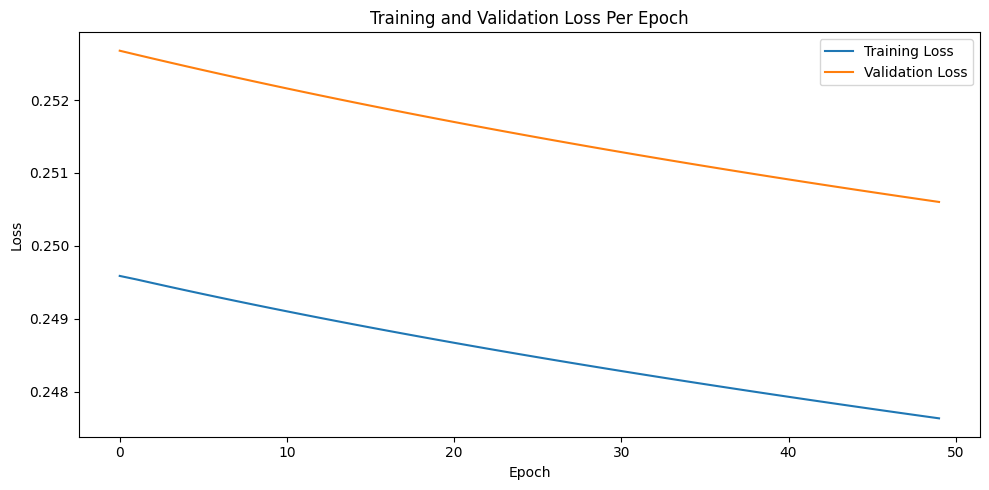

In [ ]:
# Plot model training and validation loss during training

LR = 0.1
epochs = 50
c = 0
m = np.zeros_like(X_FT_train_embedding[0])

# Define sigmoid to convert predictions into probabilities
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

train_losses = []
val_losses = []

# Stochastic gradient descent for every epoch
for epoch in range(1, epochs +1):
  train_loss_epoch = 0
  for i in range(len(X_FT_train_embedding)):
    z = np.dot(m, X_FT_train_embedding[i]) + c
    y_pred = sigmoid(z)
    # Compute the gradient with respect to m
    gr_wrt_m = X_FT_train_embedding[i] * (label_FT_train[i] - y_pred)
    # Compute the gradient with respect to c
    gr_wrt_c = label_FT_train[i] - y_pred
    # Update m and c using the gradients
    m = m + LR * gr_wrt_m
    c = c + LR * gr_wrt_c
    # Training loss for the train set
    train_loss_epoch = train_loss_epoch + np.square(label_FT_train[i] - y_pred)

  # Training set loss
  train_loss_epoch = train_loss_epoch / len(X_FT_train_embedding)
  train_losses.append(train_loss_epoch)

  # Validation loss
  val_loss_epoch = 0
  for i in range(len(X_FT_dev_embedding)):
      z = np.dot(m, X_FT_dev_embedding[i]) + c
      y_pred = sigmoid(z)
      # Validation loss for the train set
      val_loss_epoch = val_loss_epoch + np.square(label_FT_dev[i] - y_pred)
  val_loss_epoch = val_loss_epoch / len(X_FT_dev_embedding)
  val_losses.append(val_loss_epoch)

# Figure and a set of subplots
fig, axes = plt.subplots(figsize=(10, 5))

# Plotting the training and validation loss
axes.plot(train_losses, label = 'Training Loss')
axes.plot(val_losses, label = 'Validation Loss')
axes.set_title('Training and Validation Loss Per Epoch')
axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.legend()

# Display the plots
plt.tight_layout()
plt.show()


Plot model training and validation accuracy from training


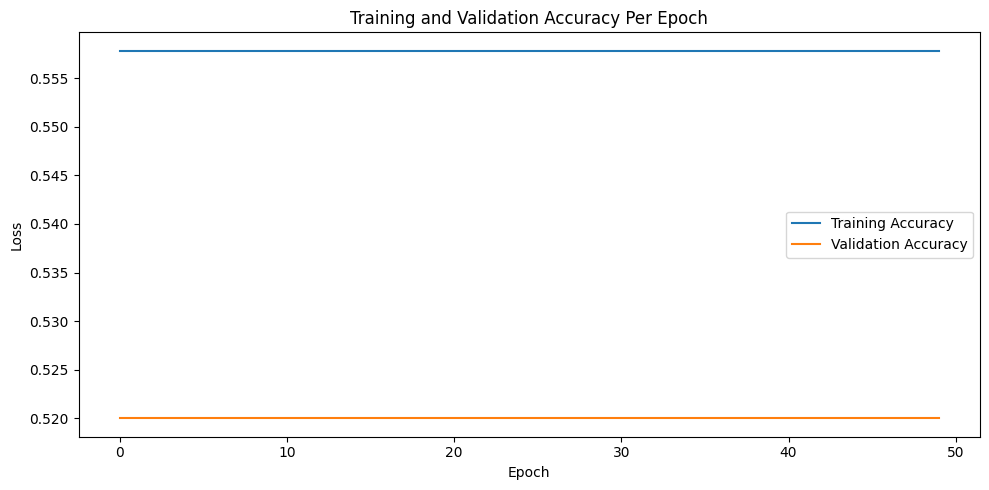

In [ ]:
# Plot accuracy from training

LR = 0.1
epochs = 50
c = 0
m = np.zeros_like(X_FT_train_embedding[0])

# Define sigmoid to convert predictions into probabilities
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

train_accuracies = []
val_accuracies = []

# Stochastic gradient descent for every epoch
for epoch in range(1, epochs +1):
  accurate_train = 0
  total_train = 0
  accurate_val = 0
  total_val = 0
  for i in range(len(X_FT_train_embedding)):
    z = np.dot(m, X_FT_train_embedding[i]) + c
    y_pred = sigmoid(z)
    # Accuracy for train set
    if y_pred >= 0.5:
      predicted_label = 1
    else:
      predicted_label = 0
    if predicted_label == label_FT_train[i]:
      accurate_train = accurate_train + 1
    total_train = total_train + 1

  train_accuracy = accurate_train / total_train
  train_accuracies.append(train_accuracy)

  # For the validation set
  for i in range(len(X_FT_dev_embedding)):
    z = np.dot(m, X_FT_dev_embedding[i]) + c
    y_pred = sigmoid(z)
    # Accuracy for train set
    if y_pred >= 0.5:
      predicted_label = 1
    else:
      predicted_label = 0
    if predicted_label == label_FT_dev[i]:
      accurate_val = accurate_val + 1
    total_val = total_val + 1

  val_accuracy = accurate_val/ total_val
  val_accuracies.append(val_accuracy)

# Create a figure and a set of subplots
fig, axes = plt.subplots(figsize=(10, 5))

# Plotting the training and validation loss
axes.plot(train_accuracies, label = 'Training Accuracy')
axes.plot(val_accuracies, label = 'Validation Accuracy')
axes.set_title('Training and Validation Accuracy Per Epoch')
axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
X_FT_train_embedding = np.array(X_FT_train_embedding)
X_FT_test_embedding = np.array(X_FT_test_embedding)
print(X_FT_train_embedding.shape)
print(X_FT_test_embedding.shape)
print(len(label_FT_train))
print(len(label_FT_test))

(67349, 128)
(472, 128)
67349
472


Finish Training Based on the Following Results



In [ ]:
# Confirm further training is not beneficial
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model_FT = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_search = GridSearchCV(estimator=model_FT, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_FT_train_embedding, label_FT_train)

optimize_model = grid_search.best_estimator_

# Use optimized model on validation set
y_dev_pred = optimize_model.predict(X_FT_dev_embedding)

# Validation Accuracy
acc_dev = 100 * accuracy_score(y_true=label_FT_dev, y_pred = y_dev_pred)

# Use optimized model on test set
y_test_pred = optimize_model.predict(X_FT_test_embedding)

# Compute accuracy on test set
acc_test = 100 * accuracy_score(y_true = label_FT_test, y_pred = y_test_pred)

# Print performance
print("Validation Accuracy: {:.2f}%".format(acc_dev))
print("Test Accuracy: {:.2f}%".format(acc_test))

Validation Accuracy: 52.00%
Test Accuracy: 50.00%


<hr />

<hr />